In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from particle_xdepths import DefaultXdepthGetter
from cascade_driver import CascadeDriver
cas_driver = CascadeDriver(xdepth_getter = DefaultXdepthGetter(30),
                           threshold_energy = 1e-1, 
                           mceq_decaying_pdgs=[],
                           height = 5)

MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
stop depth = 587.6807608756709
 |                                                  |
 |                 S I B Y L L  2.3c                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |     R. ENGEL, R.S. FLETCHER, T.K. GAISSER        |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIE

In [2]:
%autoreload 2

cas_driver.start_accumulate()
# cas_driver.stop_accumulate()
cas_driver.run(pdg = 2212, energy = 1e2, 
                mceq_decaying_pdgs = [111, -211, 211, -13, 13],
                # mceq_decaying_pdgs = [],
                threshold_energy = 1e-3)

for i in range(10000):
    cas_driver.run(pdg = 2212, energy = 1e3, 
                # mceq_decaying_pdgs = [111, -211, 211, -13, 13],
                # mceq_decaying_pdgs = [],
                # threshold_energy = 1e-1
                )
    
cas_driver.stop_accumulate()    

1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 3 number of decays = 0
5 Number of inter = 4 number of decays = 0
6 Number of inter = 4 number of decays = 19
7 Number of inter = 4 number of decays = 24
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 2 number of decays = 47
5 Number of inter = 2 number of decays = 65
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 4 number of decays = 0
4 Number of inter = 5 number of decays = 0
5 Number of inter = 5 number of decays = 82
6 Number of inter = 5 number of decays = 107
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 4 number of decays = 0
5 Number of inter = 4 number of decays = 69
6 N

In [3]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 10001
Initial state:
  $p$(2212) with energy = 1.000e+03

Final state:
  Number of final particles = 1684211
  Number of interactions = 6
  Number of decays = 50
  Max number of generations = 11

  Max xdepth = 1167.374918379408
  Exectution time = 194.90 s
  Exectution time per run = 0.02 s
  Size of cascade_driver object = 126.87 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+03 GeV
  Energy in final particles = 1.00498e+03 GeV
  Relative loss(+)/gain(-) -4.983e-03


{22: 496700, 14: 253113, -14: 248350, -11: 88762, -13: 86083, 12: 85774, 11: 84307, 13: 81320, -12: 81319, 2212: 40886, 2112: 36999, 321: 15675, 310: 14695, 130: 14125, 211: 12888, -211: 12817, -321: 11391, 3122: 7795, -2112: 5548, -2212: 4228, -3122: 1436}


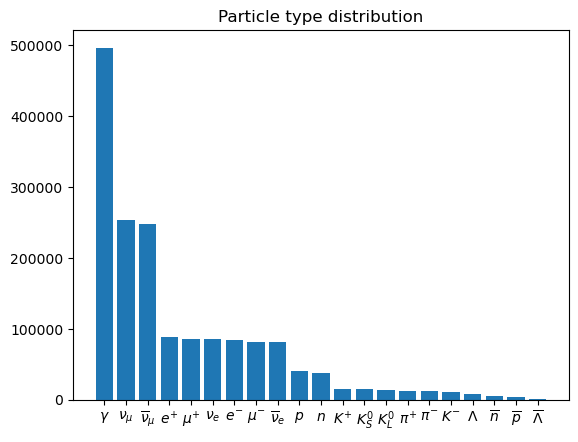

In [4]:
cascade_analysis.plot_pid(from_ = 0)

Min = 1.08e+08 eV, Max = 7.21e+11 eV


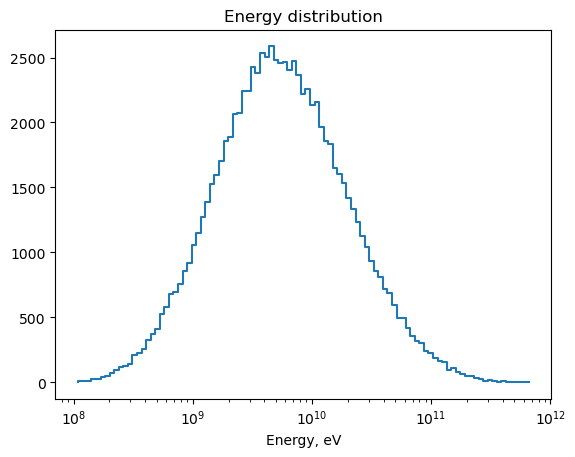

In [19]:
cascade_analysis.plot_energy(-13)

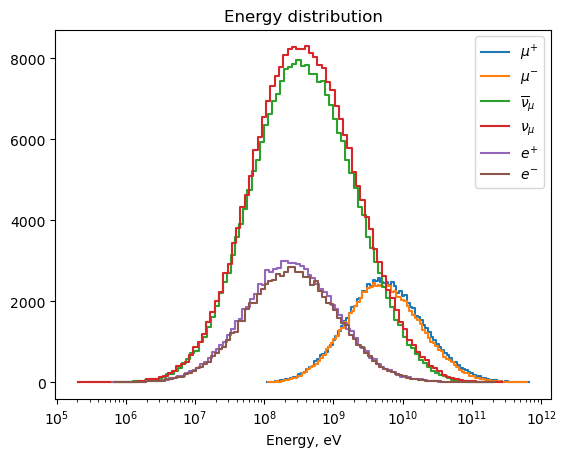

In [20]:
cascade_analysis.plot_energy_list(pids = [-13, 13, -14, 14, -11, 11])

In [13]:
from mceq_comparison import GetMCEQDist
import matplotlib.pylab as plt

res_mceq = GetMCEQDist()

MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
[50]


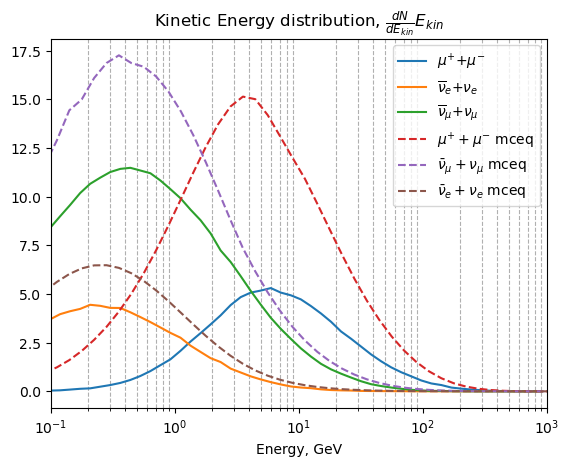

In [16]:
cascade_analysis.plot_energy_kin_dist(pids = [(-13, 13), (-12, 12), (-14, 14)], 
                                      per_run=True,
                                      xrange = (0.9e-1, 1e3),
                                      nbins=50)

plt.semilogx(res_mceq.mu_spec[0], res_mceq.mu_spec[1], label = res_mceq.mu_spec[2], linestyle='--')
plt.semilogx(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
plt.semilogx(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')

plt.xlim(1e-1, 1e3)
plt.grid()
plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3) 

[-14, 14, 2212, -13, 13]
Min = 0.21 g/cm2, Max = 587.64 g/cm2


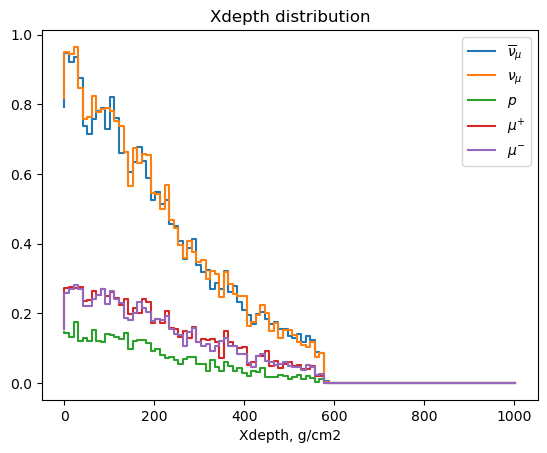

In [13]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

[11, -11, 12, -12, 13, -13, 14, -14, 22, 130, -211, 211, 310, -321, 321, 2112, -2112, 2212, -2212, 3122, -3122]
Min = 0.21 g/cm2, Max = 587.64 g/cm2


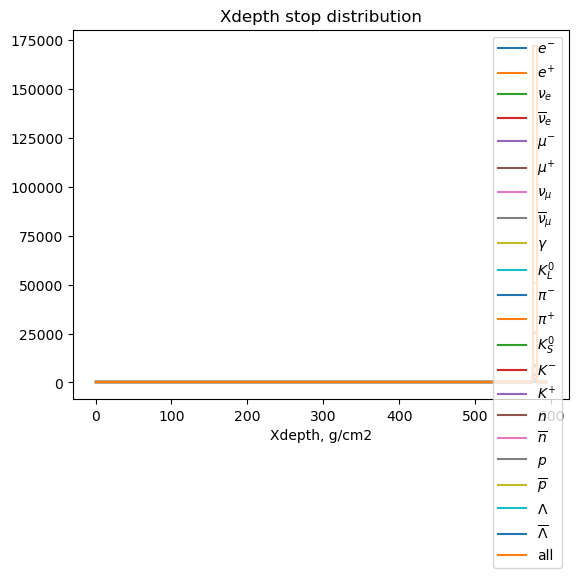

In [12]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = None,# pids = [-14, 14, 2212, -13, 13, 22], 
                                  all_pids = True, 
                                  xrange = (0, 600), per_run = False)

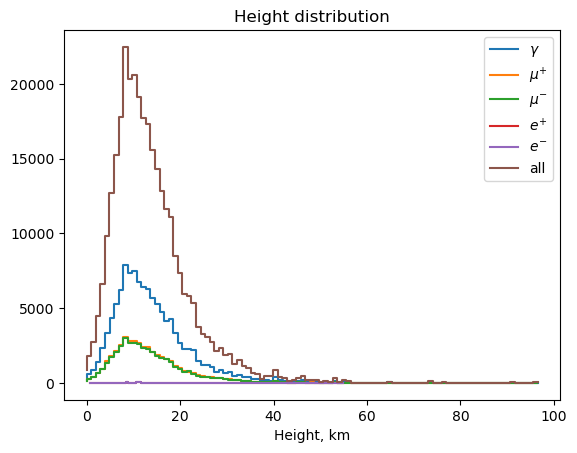

In [10]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [11]:
cascade_analysis.digitize()

100

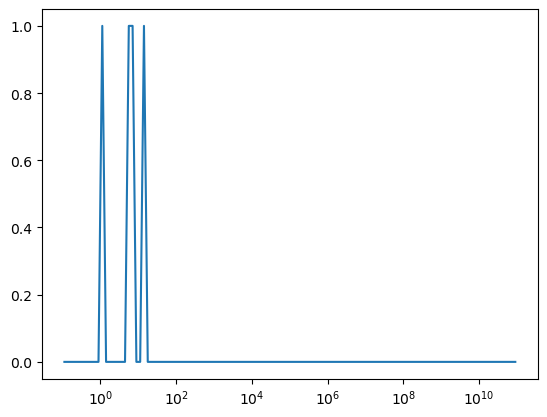

In [12]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])